In [1]:
##import pandas
import pandas as pd

In [2]:
##read selected file
df = pd.read_csv('Data/Traffic_Collision_Data_from_2019_to_Present.csv') 

In [3]:
##conduct data exploration 
df.shape

(90784, 18)

In [4]:
df.head(3)

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  200704291    01/07/2020    01/01/2019           1033        7  Wilshire   
1  191304041    01/01/2019    01/01/2019            200       13    Newton   
2  191418727    08/25/2019    01/01/2019           2250       14   Pacific   

   Reporting District  Crime Code Crime Code Description  \
0                 793         997      TRAFFIC COLLISION   
1                1383         997      TRAFFIC COLLISION   
2                1494         997      TRAFFIC COLLISION   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   

  Victim Descent  Premise Code Premise Description  \
0              W         101.0              STREET   
1              B         101.0              STREET   
2              W         101.0              STREET   

                           Address Cross Street              Location  
0                         CRENSHAW   WASHINGTON  (34.0399, -118.3311)  
1  59TH                         ST     BROADWAY  (33.9869, -118.2783)  
2                        VICKSBURG      CENTURY   (33.942, -118.4095)

In [5]:
##verify if there are any empty columns
df.columns[df.isna().all()].tolist()

[]

In [6]:
###there are no empty columns. note which columns I want to drop
columns_to_drop =['DR Number', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

In [7]:
##redefine df to exclude these dropped columns
df = df.drop(columns_to_drop,axis=1)

In [8]:
##check that these columns have been dropped from df
df.head()

Date Occurred  Time Occurred  Area ID Area Name  \
0    01/01/2019           1033        7  Wilshire   
1    01/01/2019            200       13    Newton   
2    01/01/2019           2250       14   Pacific   
3    01/01/2019           2130        8   West LA   
4    01/01/2019            240       16  Foothill   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   
3       3004 3025 3035 3036 3101 3401 3701 4027        52.0          M   
4       3037 3039 3006 3028 3101 3401 3701 4026        50.0          M   

  Victim Descent                          Address  \
0              W                         CRENSHAW   
1              B  59TH                         ST   
2              W                        VICKSBURG   
3              H  OVERLAND                     AV   
4              H  FAIR                         AV   

                      Cross Street              Location  
0                       WASHINGTON  (34.0399, -118.3311)  
1                         BROADWAY  (33.9869, -118.2783)  
2                          CENTURY   (33.942, -118.4095)  
3  NATIONAL                     BL  (34.0325, -118.4176)  
4  ARMINTA                      ST  (34.2135, -118.3747)

In [9]:
##check information type of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date Occurred   90784 non-null  object 
 1   Time Occurred   90784 non-null  int64  
 2   Area ID         90784 non-null  int64  
 3   Area Name       90784 non-null  object 
 4   MO Codes        86656 non-null  object 
 5   Victim Age      83848 non-null  float64
 6   Victim Sex      88634 non-null  object 
 7   Victim Descent  88376 non-null  object 
 8   Address         90784 non-null  object 
 9   Cross Street    84741 non-null  object 
 10  Location        90784 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 7.6+ MB


In [10]:
##make "Date Occurred" type as datetime64
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])  

In [11]:
##make 'Location' a integer
##df['Location'] = pd.to_numeric(df['Location'], errors='coerce')

In [12]:
##verify that "Date Occurred" and "Location" updated correctly
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Occurred   90784 non-null  datetime64[ns]
 1   Time Occurred   90784 non-null  int64         
 2   Area ID         90784 non-null  int64         
 3   Area Name       90784 non-null  object        
 4   MO Codes        86656 non-null  object        
 5   Victim Age      83848 non-null  float64       
 6   Victim Sex      88634 non-null  object        
 7   Victim Descent  88376 non-null  object        
 8   Address         90784 non-null  object        
 9   Cross Street    84741 non-null  object        
 10  Location        90784 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [13]:
##I want to have the coordinates in separate columns because I'm running into issues later since they're all in in column.
df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)

Latitude  Longitude
0      34.0399  -118.3311
1      33.9869  -118.2783
2       33.942  -118.4095
3      34.0325  -118.4176
4      34.2135  -118.3747
...        ...        ...
90779  34.2674  -118.4222
90780   33.998  -118.4108
90781  34.1106  -118.1908
90782  34.0453  -118.2483
90783  34.0472   -118.309

[90784 rows x 2 columns]

In [14]:
##redefine df so that these columns are saved and verify that it works.

df = pd.concat((df, df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)), axis=1)
df.head(1)

Date Occurred  Time Occurred  Area ID Area Name  \
0    2019-01-01           1033        7  Wilshire   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   

  Victim Descent   Address Cross Street              Location Latitude  \
0              W  CRENSHAW   WASHINGTON  (34.0399, -118.3311)  34.0399   

   Longitude  
0  -118.3311

In [15]:
##run a command so that the data only has the timeframe i want. i want through 3/18/2020 
##since LA shelter in place began 3/19/2020
mask = (df['Date Occurred'] >= '01/01/2019') & (df['Date Occurred'] <= '03/18/2020')
df1=df.loc[mask]
print(df.loc[mask])

      Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
1        2019-01-01            200       13       Newton   
2        2019-01-01           2250       14      Pacific   
3        2019-01-01           2130        8      West LA   
4        2019-01-01            240       16     Foothill   
...             ...            ...      ...          ...   
68105    2020-03-18             25        3    Southwest   
68106    2020-03-18           1500       12  77th Street   
68107    2020-03-18           1510       18    Southeast   
68108    2020-03-18           1740        3    Southwest   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                     3101 3401 3701 3004 3030 3036        49.0          F   
2      3003 3025 3029 3035 3037 3101 3401 370

In [16]:
##this looks good. now i will sort by date occurred in case it isn't already sorted.
df1.sort_values(by='Date Occurred')

Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
92       2019-01-01           1900        7     Wilshire   
91       2019-01-01           1930        7     Wilshire   
90       2019-01-01             50        7     Wilshire   
89       2019-01-01           2120        7     Wilshire   
...             ...            ...      ...          ...   
68052    2020-03-18           1400       15  N Hollywood   
68051    2020-03-18           1120       21      Topanga   
68050    2020-03-18           2245       21      Topanga   
68048    2020-03-18           1120       17   Devonshire   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
92     3006 3028 3030 3035 3037 3101 3401 3701 4027        36.0          M   
91     3006 3028 3030 3035 3037 3101 3401 3701 4027        30.0          F   
90     3006 3028 3030 3035 3037 3101 3401 3701 4007         NaN          F   
89     3004 3028 3030 3035 3037 3101 3401 3701 4027        38.0          M   
...                                             ...         ...        ...   
68052                 3006 3028 3034 3037 3101 4026        50.0          M   
68051                      3009 3025 3037 3101 4021        22.0          M   
68050                      3006 3026 3037 3101 4021        30.0          F   
68048                 3006 3028 3030 3037 3101 4017        45.0          M   
68109                                           NaN        40.0          F   

      Victim Descent                          Address  \
0                  W                         CRENSHAW   
92                 O  HIGHLAND                     AV   
91                 H  LA BREA                      AV   
90                 O  SAINT ELMO                   DR   
89                 W  OLYMPIC                      BL   
...              ...                              ...   
68052              W  VANOWEN                      ST   
68051              O  ROSCOE                       BL   
68050              X  VANOWEN                      ST   
68048              H  TAMPA                        AV   
68109              W  VANOWEN                      ST   

                          Cross Street              Location Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)  34.0399   
92     3RD                          ST  (34.0783, -118.3392)  34.0783   
91     WASHINGTON                   BL  (34.0404, -118.3475)  34.0404   
90     RIMPAU                       AV  (34.0434, -118.3418)  34.0434   
89     MANSFIELD                    AV  (34.0572, -118.3425)  34.0572   
...                                ...                   ...      ...   
68052  WHITSETT                     AV   (34.194, -118.4052)   34.194   
68051  DE SOTO                      AV    (34.22, -118.5885)    34.22   
68050  OSO                          AV  (34.1938, -118.5753)  34.1938   
68048  NORDHOFF                     WY  (34.2355, -118.5536)  34.2355   
68109  VANALDEN                     AV  (34.1939, -118.5491)  34.1939   

       Longitude  
0      -118.3311  
92     -118.3392  
91     -118.3475  
90     -118.3418  
89     -118.3425  
...          ...  
68052  -118.4052  
68051  -118.5885  
68050  -118.5753  
68048  -118.5536  
68109  -118.5491  

[68110 rows x 13 columns]

In [17]:
##check the overall size of the dataframe
df1.shape

(68110, 13)

In [18]:
##i was able to remove 30k rows by placing the date filter.
##confirm again that df1 only includes dates through 3/18/20 and nothing past this date
df1.tail()

Date Occurred  Time Occurred  Area ID    Area Name  \
68105    2020-03-18             25        3    Southwest   
68106    2020-03-18           1500       12  77th Street   
68107    2020-03-18           1510       18    Southeast   
68108    2020-03-18           1740        3    Southwest   
68109    2020-03-18           1445       10  West Valley   

                            MO Codes  Victim Age Victim Sex Victim Descent  \
68105                            NaN        45.0          F              H   
68106  4012 3037 3004 3026 3029 3101        40.0          M              B   
68107  4025 3037 3004 3028 3030 3101        23.0          M              H   
68108                            NaN        38.0          F              H   
68109                            NaN        40.0          F              W   

                                  Address                     Cross Street  \
68105     WESTERN                      AV  42ND                         PL   
68106  S  WESTERN                      AV  81ST                         ST   
68107     MONA                         BL  112TH                        ST   
68108  W  VERNON                       AV  DENKER                       AV   
68109     VANOWEN                      ST  VANALDEN                     AV   

                   Location Latitude  Longitude  
68105  (34.0061, -118.3089)  34.0061  -118.3089  
68106   (33.9655, -118.309)  33.9655   -118.309  
68107   (33.939, -118.2314)   33.939  -118.2314  
68108  (34.0037, -118.3045)  34.0037  -118.3045  
68109  (34.1939, -118.5491)  34.1939  -118.5491

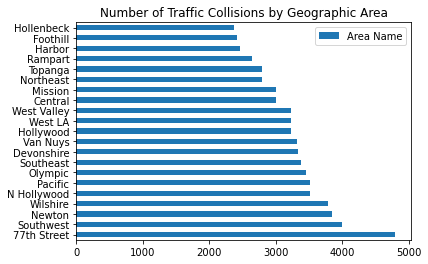

In [19]:
##this chart demonstrates the amount of traffic collisions per Area ID in Los Angeles. 
##The City of Los Angeles has 21 geographic areas or patrol divisions.
df1['Area Name'].value_counts().plot.barh(
    legend = True,
    title = 'Number of Traffic Collisions by Geographic Area')

In [20]:
##i want to clean up data a bit more so I can graph it easier later.
df1['Month'] = pd.DatetimeIndex(df1['Date Occurred']).month
df1['Year'] = pd.DatetimeIndex(df1['Date Occurred']).year
df1_grouped = (df1.groupby(['Year', 'Month'])
                .size()
                .reset_index(name="n_traffic_accidents"))
df1_grouped

<ipython-input-20-8b2266940c5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.DatetimeIndex(df1['Date Occurred']).month
<ipython-input-20-8b2266940c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.DatetimeIndex(df1['Date Occurred']).year


Year  Month  n_traffic_accidents
0   2019      1                 4548
1   2019      2                 4420
2   2019      3                 4929
3   2019      4                 4527
4   2019      5                 4667
5   2019      6                 4491
6   2019      7                 4864
7   2019      8                 4950
8   2019      9                 4911
9   2019     10                 5063
10  2019     11                 4593
11  2019     12                 4660
12  2020      1                 4277
13  2020      2                 4568
14  2020      3                 2642

In [21]:
##add a new column of 'month-year' and populate column. i ultimately want a graph of month-year and n_traffic_accidents
df1_grouped['Month-Year'] = 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sept 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020'
df1_grouped

Year  Month  n_traffic_accidents Month-Year
0   2019      1                 4548   Jan 2019
1   2019      2                 4420   Feb 2019
2   2019      3                 4929   Mar 2019
3   2019      4                 4527   Apr 2019
4   2019      5                 4667   May 2019
5   2019      6                 4491   Jun 2019
6   2019      7                 4864   Jul 2019
7   2019      8                 4950   Aug 2019
8   2019      9                 4911  Sept 2019
9   2019     10                 5063   Oct 2019
10  2019     11                 4593   Nov 2019
11  2019     12                 4660   Dec 2019
12  2020      1                 4277   Jan 2020
13  2020      2                 4568   Feb 2020
14  2020      3                 2642   Mar 2020

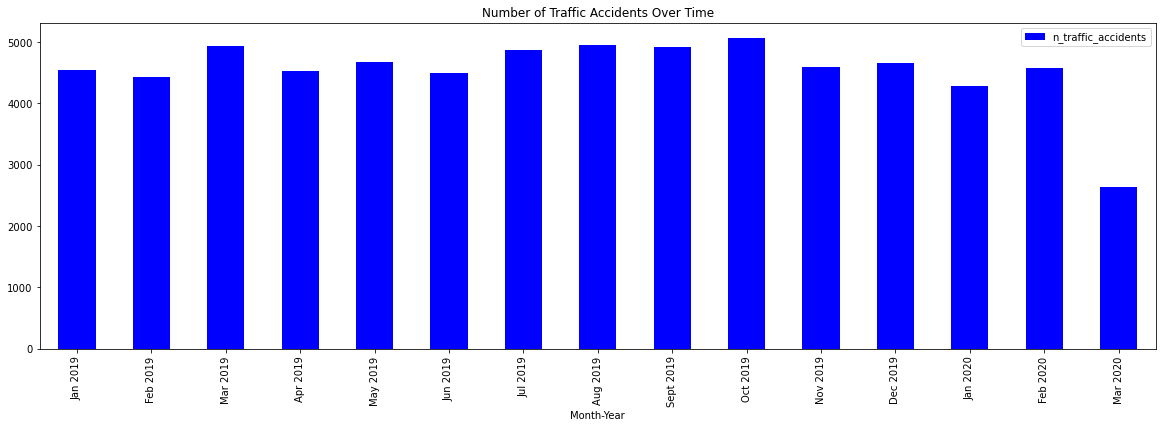

In [22]:
##i'm not sure how to edit the x-axis so that each bar has its month-year noted. update: did it!
##getting to this step from previous steps took a lot of time and going on stack overflow.

df1_grouped.plot.bar(x="Month-Year", y="n_traffic_accidents", color='blue', 
                     title = 'Number of Traffic Accidents Over Time',
                    figsize=(20, 6));

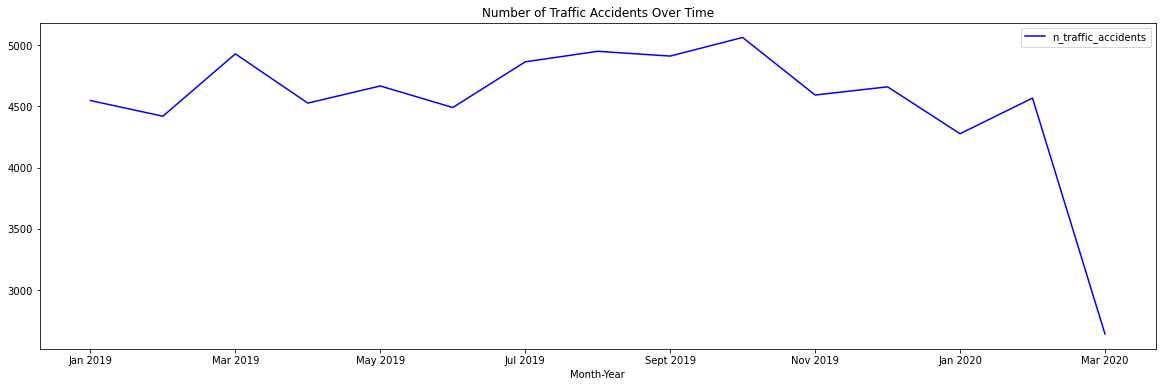

In [23]:
##bar graph is not as easy to see so I will do a line graph too. 
df1_grouped.plot(x="Month-Year", y="n_traffic_accidents", color='blue', 
                 title = 'Number of Traffic Accidents Over Time',
                figsize=(20, 6))

In [24]:
##save this data as a CSV. df1 is the pre-covid data. 
df1.to_csv('Pre-Covid19_Data_Trimmed.csv')

In [25]:
##import geopandas
import geopandas as gpd

In [26]:
##i want to see LA neighborhoods, which will ultimately be used as base map.
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')


In [27]:
##remove columns i don't need.
neighborhoods =neighborhoods[['name','geometry']]
neighborhoods.head(1)

name                                           geometry
0  Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...

In [28]:
#make sure EPSG is 4326.
neighborhoods.set_crs(epsg=4326, inplace=True)

name                                           geometry
0              Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...
1    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...
2       Agoura Hills  MULTIPOLYGON (((-118.76193 34.16820, -118.7263...
3         Agua Dulce  MULTIPOLYGON (((-118.25468 34.55830, -118.2555...
4           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...
..               ...                                                ...
267      Willowbrook  MULTIPOLYGON (((-118.23005 33.92809, -118.2280...
268       Wilmington  MULTIPOLYGON (((-118.22476 33.82461, -118.2245...
269   Windsor Square  MULTIPOLYGON (((-118.31371 34.07631, -118.3138...
270         Winnetka  MULTIPOLYGON (((-118.56221 34.23150, -118.5621...
271   Woodland Hills  MULTIPOLYGON (((-118.57569 34.18822, -118.5736...

[272 rows x 2 columns]

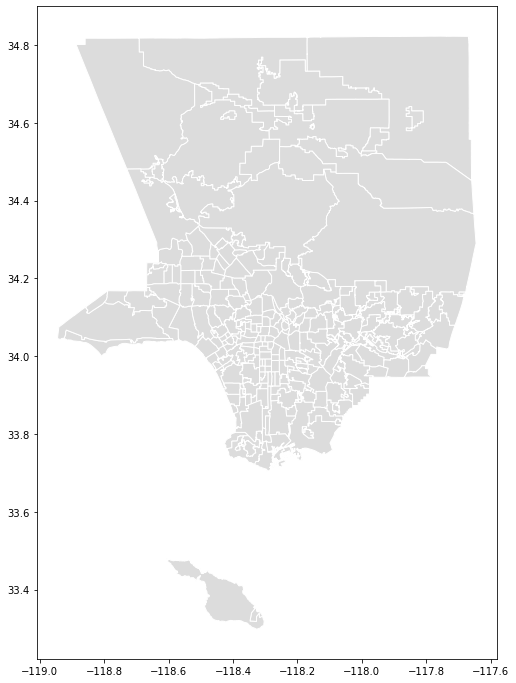

In [29]:
#plot the LA neighborhoods to see what it will look like
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [30]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import matplotlib.pyplot as plt

In [31]:
#import my pre-covid 19 data as a CSV
dfx = pd.read_csv('Pre-Covid19_Data_Trimmed.csv') 

In [32]:
#do some data exploration
dfx.shape

(68110, 16)

In [33]:
list(dfx)

['Unnamed: 0',
 'Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Address',
 'Cross Street',
 'Location',
 'Latitude',
 'Longitude',
 'Month',
 'Year']

In [34]:
#make the dataframe into a geodataframe and make sure it is EGPS 4326
traffic = gpd.GeoDataFrame(dfx, geometry=gpd.points_from_xy(dfx.Longitude, dfx.Latitude))
traffic.set_crs(epsg=4326, inplace=True)

Unnamed: 0 Date Occurred  Time Occurred  Area ID    Area Name  \
0               0    2019-01-01           1033        7     Wilshire   
1               1    2019-01-01            200       13       Newton   
2               2    2019-01-01           2250       14      Pacific   
3               3    2019-01-01           2130        8      West LA   
4               4    2019-01-01            240       16     Foothill   
...           ...           ...            ...      ...          ...   
68105       68105    2020-03-18             25        3    Southwest   
68106       68106    2020-03-18           1500       12  77th Street   
68107       68107    2020-03-18           1510       18    Southeast   
68108       68108    2020-03-18           1740        3    Southwest   
68109       68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                     3101 3401 3701 3004 3030 3036        49.0          F   
2      3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   
3           3004 3025 3035 3036 3101 3401 3701 4027        52.0          M   
4           3037 3039 3006 3028 3101 3401 3701 4026        50.0          M   
...                                             ...         ...        ...   
68105                                           NaN        45.0          F   
68106                 4012 3037 3004 3026 3029 3101        40.0          M   
68107                 4025 3037 3004 3028 3030 3101        23.0          M   
68108                                           NaN        38.0          F   
68109                                           NaN        40.0          F   

      Victim Descent                             Address  \
0                  W                            CRENSHAW   
1                  B     59TH                         ST   
2                  W                           VICKSBURG   
3                  H     OVERLAND                     AV   
4                  H     FAIR                         AV   
...              ...                                 ...   
68105              H     WESTERN                      AV   
68106              B  S  WESTERN                      AV   
68107              H     MONA                         BL   
68108              H  W  VERNON                       AV   
68109              W     VANOWEN                      ST   

                          Cross Street              Location  Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)   34.0399   
1                             BROADWAY  (33.9869, -118.2783)   33.9869   
2                              CENTURY   (33.942, -118.4095)   33.9420   
3      NATIONAL                     BL  (34.0325, -118.4176)   34.0325   
4      ARMINTA                      ST  (34.2135, -118.3747)   34.2135   
...                                ...                   ...       ...   
68105  42ND                         PL  (34.0061, -118.3089)   34.0061   
68106  81ST                         ST   (33.9655, -118.309)   33.9655   
68107  112TH                        ST   (33.939, -118.2314)   33.9390   
68108  DENKER                       AV  (34.0037, -118.3045)   34.0037   
68109  VANALDEN                     AV  (34.1939, -118.5491)   34.1939   

       Longitude  Month  Year                     geometry  
0      -118.3311      1  2019  POINT (-118.33110 34.03990)  
1      -118.2783      1  2019  POINT (-118.27830 33.98690)  
2      -118.4095      1  2019  POINT (-118.40950 33.94200)  
3      -118.4176      1  2019  POINT (-118.41760 34.03250)  
4      -118.3747      1  2019  POINT (-118.37470 34.21350)  
...          ...    ...   ...                          ...  
68105  -118.3089      3  2020  POINT (-118.30890 34.00610)  
68106  -118.3090      3  2020  POINT (-118.30900 33.96550)  
68107  -118.2314      3  2020  POINT (-118.231

In [35]:
traffic.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68110 non-null  int64   
 1   Date Occurred   68110 non-null  object  
 2   Time Occurred   68110 non-null  int64   
 3   Area ID         68110 non-null  int64   
 4   Area Name       68110 non-null  object  
 5   MO Codes        66068 non-null  object  
 6   Victim Age      62732 non-null  float64 
 7   Victim Sex      66431 non-null  object  
 8   Victim Descent  66185 non-null  object  
 9   Address         68110 non-null  object  
 10  Cross Street    63952 non-null  object  
 11  Location        68110 non-null  object  
 12  Latitude        68110 non-null  float64 
 13  Longitude       68110 non-null  float64 
 14  Month           68110 non-null  int64   
 15  Year            68110 non-null  int64   
 16  geometry        68110 non-null  geometry
dtypes: f

In [36]:
##there are some coordinates that are 0,0 which are causing me issues. i will filter these out.
traffic1= (traffic[traffic["Latitude"] >= 33])
traffic1.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date Occurred   68104 non-null  object  
 2   Time Occurred   68104 non-null  int64   
 3   Area ID         68104 non-null  int64   
 4   Area Name       68104 non-null  object  
 5   MO Codes        66062 non-null  object  
 6   Victim Age      62727 non-null  float64 
 7   Victim Sex      66425 non-null  object  
 8   Victim Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

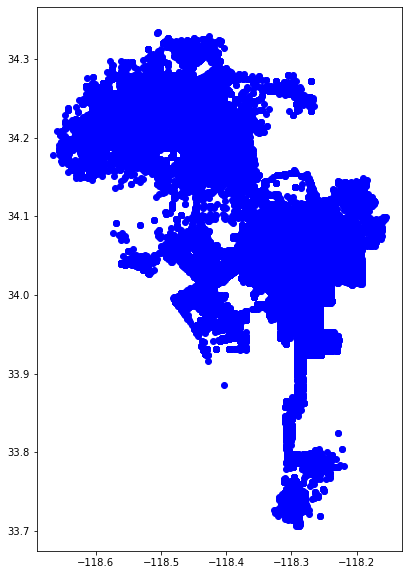

In [37]:
#plot the traffic collisions
traffic1.plot(figsize=(30,10), color='blue')

In [38]:
#double check that my two datasets are same CRS
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
#double check that my two datasets are same CRS
traffic1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
#confirm that i was able to drop the 0,0 coordinates from the original dataset
traffic1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date Occurred   68104 non-null  object  
 2   Time Occurred   68104 non-null  int64   
 3   Area ID         68104 non-null  int64   
 4   Area Name       68104 non-null  object  
 5   MO Codes        66062 non-null  object  
 6   Victim Age      62727 non-null  float64 
 7   Victim Sex      66425 non-null  object  
 8   Victim Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

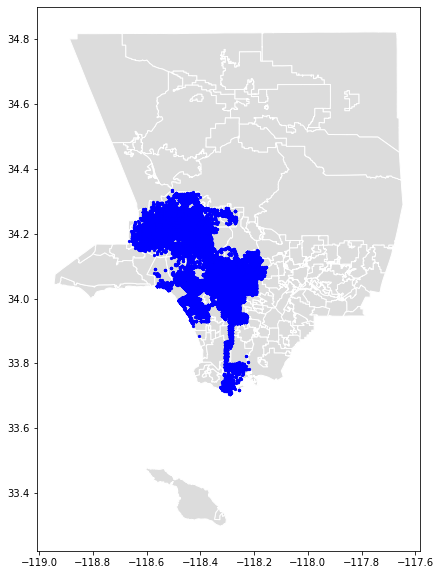

In [41]:
#now i will try to overlay the two datasets. it is not working.

# first define which layers will be your "base"
base = neighborhoods.plot(figsize=(30,10),color='gainsboro', edgecolor='white')

# define the layer that will go on top, and add the base layer to the `ax` argument
ax = traffic1.plot(ax = base, color='blue', markersize=5)

In [42]:
traffic1.geometry.total_bounds

array([-118.6652,   33.7065, -118.1554,   34.3343])

In [43]:
minx, miny, maxx, maxy = traffic1.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6652
-118.1554
33.7065
34.3343


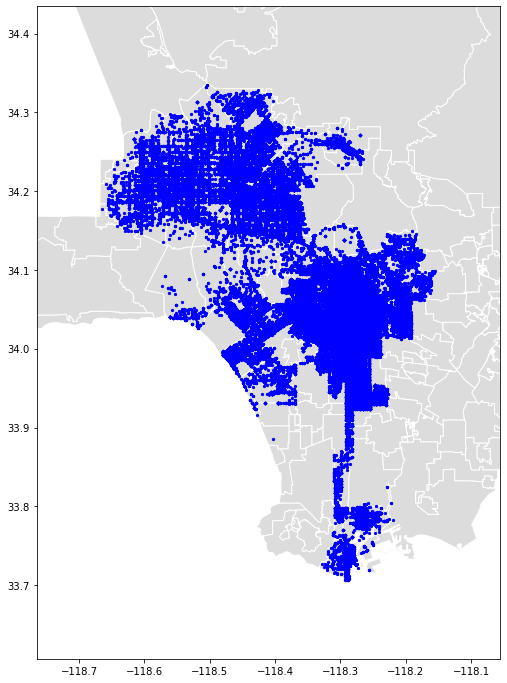

In [44]:
# use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = traffic1.plot(ax=base, marker='o', color='blue', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

In [45]:
join = gpd.sjoin(neighborhoods,
                 traffic1,
                 how='right')

In [46]:
join.head()

index_left             name  Unnamed: 0 Date Occurred  Time Occurred  \
42626         1.0  Adams-Normandie       42626    2019-10-02            800   
42626       232.0  University Park       42626    2019-10-02            800   
47111         1.0  Adams-Normandie       47111    2019-10-30           1620   
47111       232.0  University Park       47111    2019-10-30           1620   
23161         1.0  Adams-Normandie       23161    2019-06-01           1800   

       Area ID  Area Name                       MO Codes  Victim Age  \
42626        3  Southwest                            NaN        33.0   
42626        3  Southwest                            NaN        33.0   
47111        3  Southwest       3036 3004 3028 3039 3101        52.0   
47111        3  Southwest       3036 3004 3028 3039 3101        52.0   
23161        3  Southwest  3037 4003 3004 3028 3030 3101        18.0   

      Victim Sex Victim Descent                             Address  \
42626          M              W  W  ADAMS                        BL   
42626          M              W  W  ADAMS                        BL   
47111          F              B     VERMONT                      AV   
47111          F              B     VERMONT                      AV   
23161          X              X     ADAMS                        BL   

                             Cross Street              Location  Latitude  \
42626  S  VERMONT                      AV  (34.0328, -118.2915)   34.0328   
42626  S  VERMONT                      AV  (34.0328, -118.2915)   34.0328   
47111     ADAMS                        BL  (34.0328, -118.2915)   34.0328   
47111     ADAMS                        BL  (34.0328, -118.2915)   34.0328   
23161     VERMONT                      AV  (34.0328, -118.2915)   34.0328   

       Longitude  Month  Year                     geometry  
42626  -118.2915     10  2019  POINT (-118.29150 34.03280)  
42626  -118.2915     10  2019  POINT (-118.29150 34.03280)  
47111  -118.2915     10  2019  POINT (-118.29150 34.03280)  
47111  -118.2915     10  2019  POINT (-118.29150 34.03280)  
23161  -118.2915      6  2019  POINT (-118.29150 34.03280)

In [47]:
traffic_collisions_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='traffic_collision_count')

In [48]:
traffic_collisions_by_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     149 non-null    object
 1   traffic_collision_count  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [49]:
traffic_collisions_by_neighborhoods['avg_traffic_collisions_per_day'] = traffic_collisions_by_neighborhoods['traffic_collision_count']/442 
traffic_collisions_by_neighborhoods.head()

name  traffic_collision_count  avg_traffic_collisions_per_day
0   Downtown                     3455                        7.816742
1   Van Nuys                     2212                        5.004525
2  Hollywood                     2048                        4.633484
3  Koreatown                     1804                        4.081448
4   Westlake                     1660                        3.755656

In [50]:
traffic_collisions_by_neighborhoods.tail()

name  traffic_collision_count  avg_traffic_collisions_per_day
144        Calabasas                        2                        0.004525
145   South Pasadena                        1                        0.002262
146         Pasadena                        1                        0.002262
147  Manhattan Beach                        1                        0.002262
148         Alhambra                        1                        0.002262

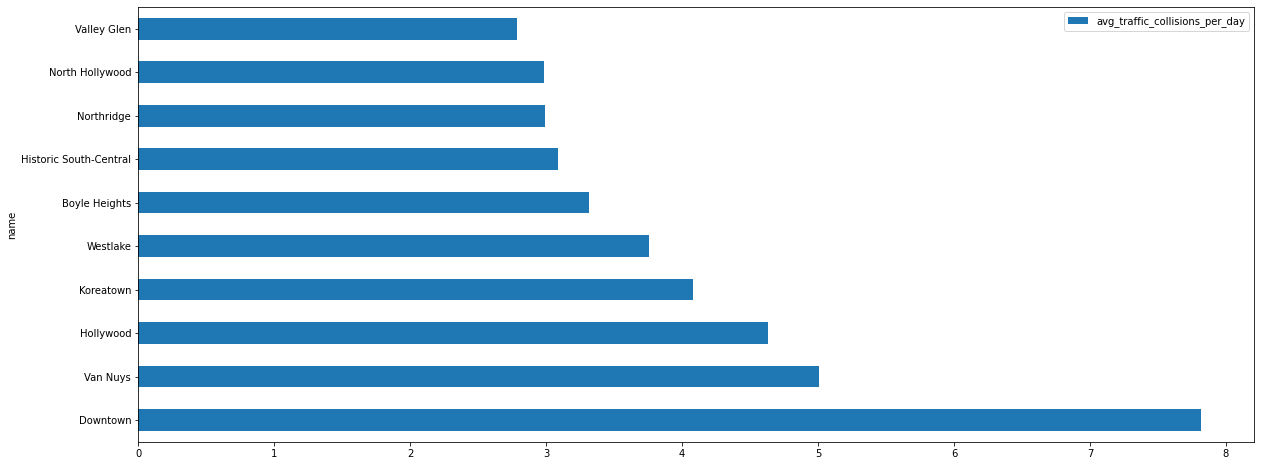

In [51]:
traffic_collisions_by_neighborhoods[:10].plot.barh(figsize=(20,8),x='name',y='avg_traffic_collisions_per_day')

In [52]:
# join the summary table back to the neighborhood geodatabase
neighborhoods=neighborhoods.merge(traffic_collisions_by_neighborhoods,on='name')

In [53]:
# our neighborhood table now has a count column
neighborhoods.head()

name                                           geometry  \
0    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...   
1           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...   
2             Arleta  MULTIPOLYGON (((-118.42202 34.22410, -118.4228...   
3  Arlington Heights  MULTIPOLYGON (((-118.31591 34.05261, -118.3134...   
4             Athens  MULTIPOLYGON (((-118.29166 33.93096, -118.2915...   

   traffic_collision_count  avg_traffic_collisions_per_day  
0                      294                        0.665158  
1                        1                        0.002262  
2                      293                        0.662896  
3                      406                        0.918552  
4                        9                        0.020362

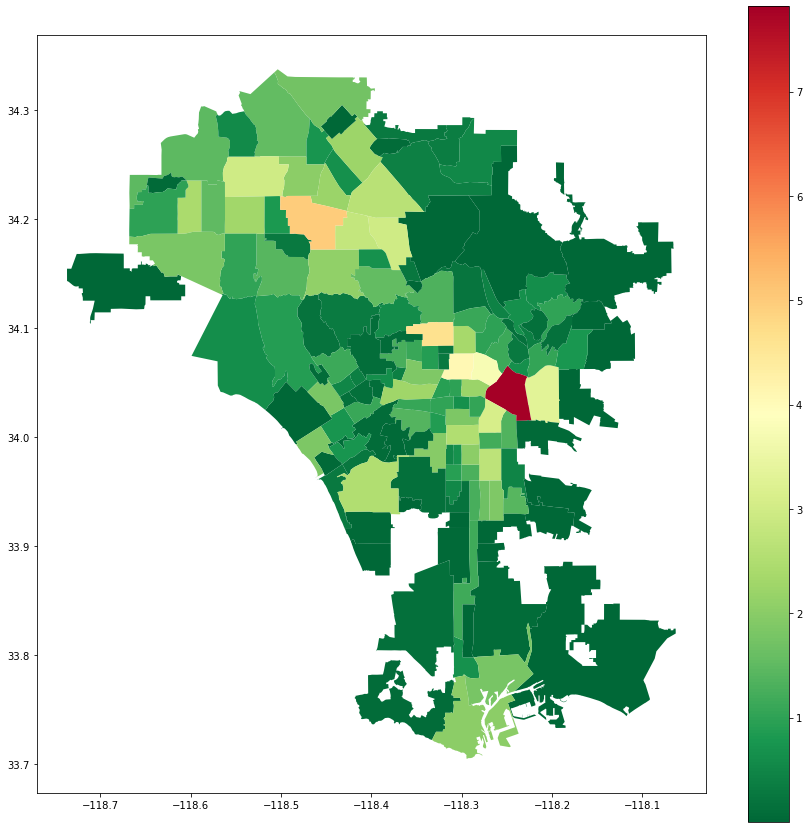

In [54]:
# plot it!
neighborhoods.plot(figsize=(15,15),column='avg_traffic_collisions_per_day',legend=True,cmap='RdYlGn_r')

In [55]:
import contextily as ctx

In [56]:
neighborhoods = neighborhoods.to_crs(epsg=3857)

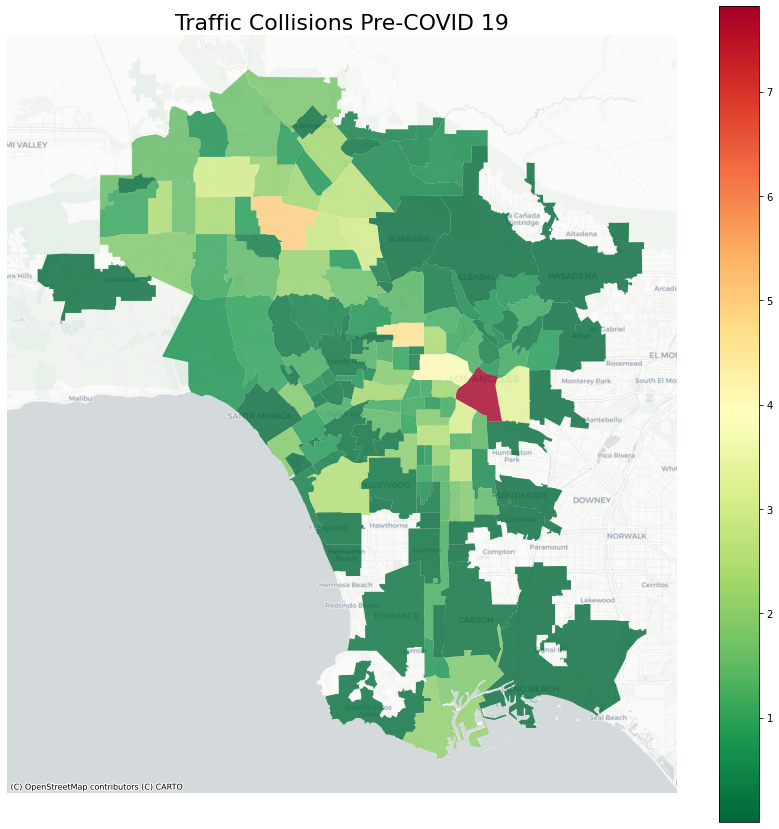

In [57]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='avg_traffic_collisions_per_day',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Traffic Collisions Pre-COVID 19',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [58]:
import plotly.express as px

In [59]:

# reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [60]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [62]:
center_lat=(maxy-miny)/2+miny
center_lat

34.020922350091055

In [63]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.40011100000015

In [64]:
fig = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='avg_traffic_collisions_per_day',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()